In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import random forest classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn import tree

In [2]:
validated_labels = pd.read_csv('data/test_set_seattle.csv')
# validated_labels = validated_labels[validated_labels['label_type'] == 'CurbRamp']

# validated_labels['heading_diff'] = validated_labels['heading_diff'].abs()
# validated_labels['pitch_diff'] = validated_labels['pitch_diff'].abs()
# validated_labels.fillna(0,  inplace=True)
# len(validated_labels)
#24984 rows -> 12117 rows Wrong, 12867 rows Correct

In [9]:
label_types = validated_labels ['label_type'].unique().tolist()
label_types

['CurbRamp',
 'SurfaceProblem',
 'Obstacle',
 'NoCurbRamp',
 'NoSidewalk',
 'Occlusion',
 'Other',
 'Crosswalk',
 'Signal']

In [4]:
print((validated_labels['verified']== 1).sum())

12867


In [3]:
feature_cols = ['count', 'severity', 'zoom', 'tag_list', 'distance', 'description']
# X = validated_labels[feature_cols] # Features
# y = validated_labels.verified # Target variable

In [4]:
# X = validated_labels[feature_cols] # Features
# y = validated_labels.verified # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14) # 50% training and 50% test

# # Decision Tree classifer
# clf = RandomForestClassifier(criterion="gini", n_estimators= 2, max_depth=4, max_leaf_nodes = 12, class_weight = "balanced").fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# # Model Accuracy
# print("Accuracy:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8447021373351523


In [7]:
df_train['label_type'].unique().tolist()

['Obstacle']

In [10]:
summary = pd.DataFrame(columns=['label_type', 'Accuracy'])

for i in range(0,1):
    df_train = validated_labels[validated_labels['label_type'] == label_types[i]]
    X = df_train[feature_cols] # Features
    y = df_train.verified # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14) # 50% training and 50% test

    # Decision Tree classifer
    clf = RandomForestClassifier(criterion="gini", n_estimators= 2, max_depth=3, max_leaf_nodes = 12, class_weight = "balanced").fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # summary = summary.append({'label_type': label_types[i], 'precision': metrics.precision_score(y_test, y_pred)}, ignore_index=True)
    summary = summary.append({'label_type': label_types[i], 'Accuracy': metrics.accuracy_score(y_test, y_pred)}, ignore_index=True)

In [9]:
summary

,label_type,Accuracy
0,CurbRamp,0.645294
1,SurfaceProblem,0.620809
2,Obstacle,0.524399
3,NoCurbRamp,0.682547
4,NoSidewalk,0.867647


In [25]:
# Model Precision - tp / (tp + fp)
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8902976846747519


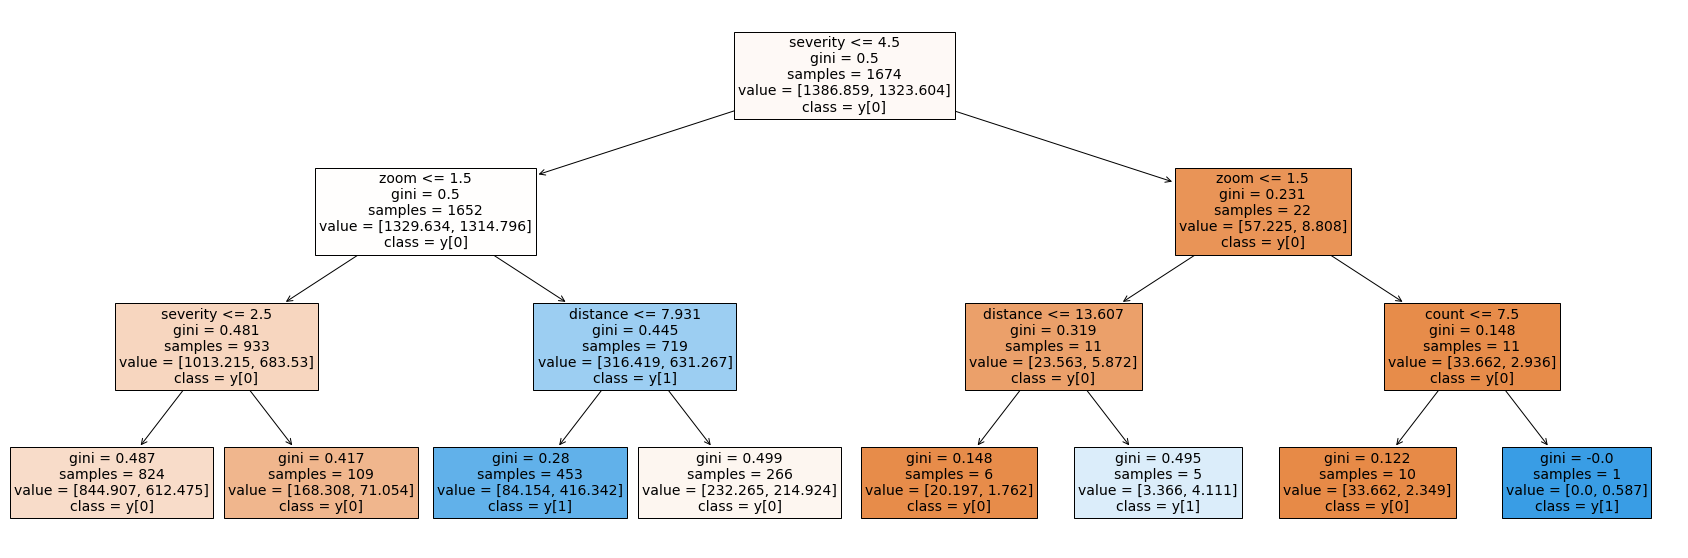

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(30,10))

tree.plot_tree(clf[1], 
                feature_names=feature_cols,  
                class_names=True,
                filled=True,
                fontsize=14)

plt.savefig('tree_1.svg', format='svg')

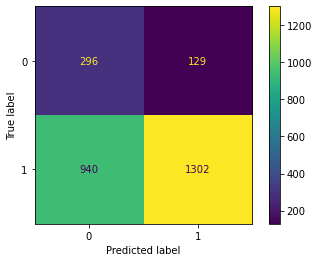

In [18]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.plot()